
MODEL PERFORMANCE METRICS
MAE:  94.621
RMSE: 129.487
R²:   0.984

Cross-Validation R²: 0.983 ± 0.000


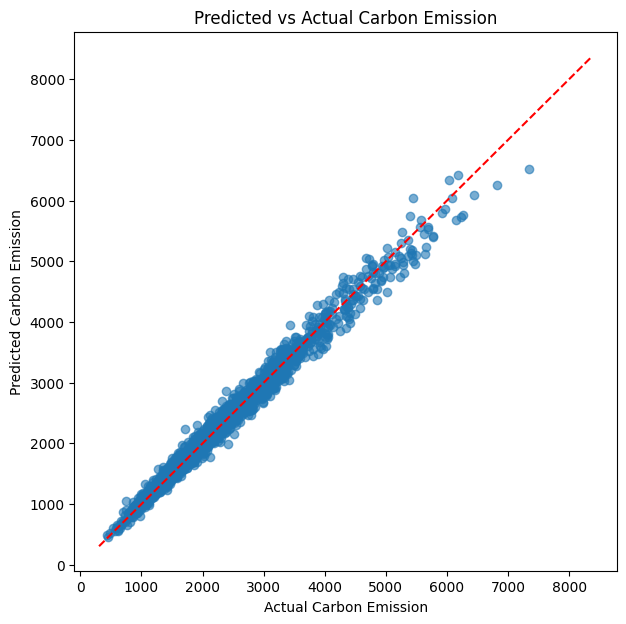

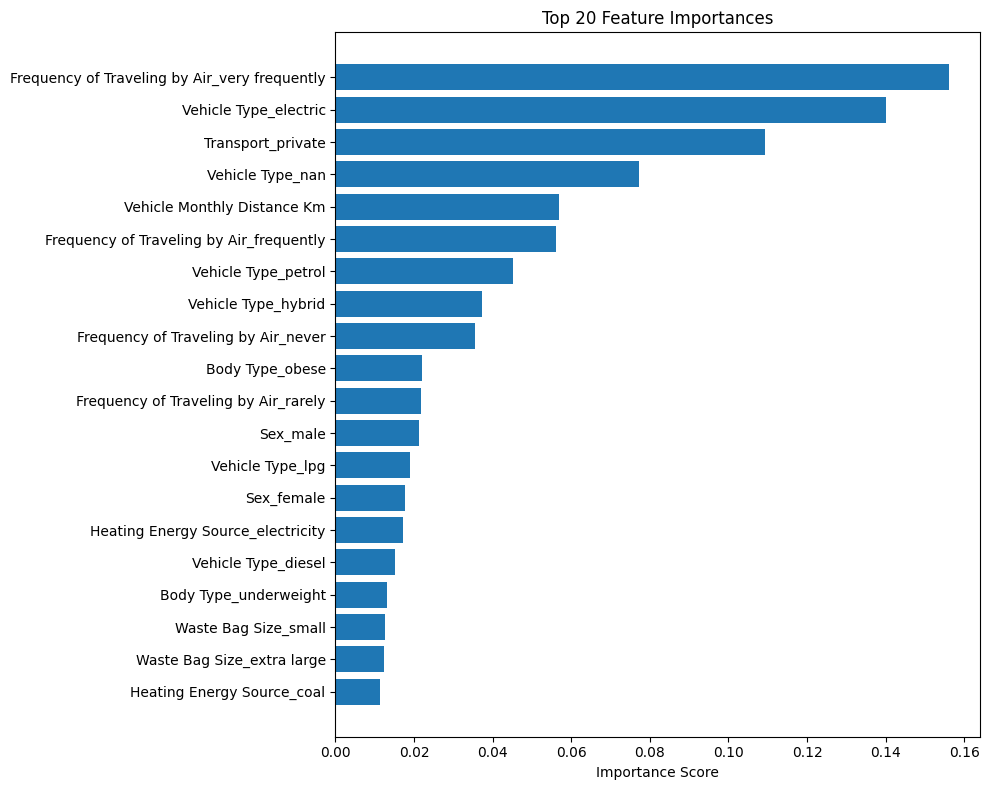

In [3]:
# ============================================
#  CARBON EMISSION PREDICTION PIPELINE
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# ----------------------------
# 1. LOAD THE DATA
# ----------------------------
# Replace 'carbon_emission_data.csv' with your actual dataset path
df = pd.read_csv(r"C:\Users\Admin\Desktop\LY Project C55\Carbon Emission.csv")

# Strip extra spaces in column names (like ' Diet' etc.)
df.columns = df.columns.str.strip()

# ----------------------------
# 2. DEFINE FEATURES AND TARGET
# ----------------------------
target = 'CarbonEmission'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# ----------------------------
# 3. PREPROCESSING
# ----------------------------
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ----------------------------
# 4. MODEL SELECTION
# ----------------------------
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# ----------------------------
# 5. TRAIN / TEST SPLIT
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 6. TRAIN THE MODEL
# ----------------------------
pipeline.fit(X_train, y_train)

# ----------------------------
# 7. EVALUATE THE MODEL
# ----------------------------
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE METRICS")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# ----------------------------
# 8. CROSS-VALIDATION (OPTIONAL)
# ----------------------------
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"\nCross-Validation R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# ----------------------------
# 9. VISUALIZE RESULTS
# ----------------------------

# (A) Predicted vs Actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Predicted vs Actual Carbon Emission")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# (B) Feature Importances
# Extract feature names after preprocessing
cat_features_encoded = pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

all_features = np.concatenate([numerical_features, cat_features_encoded])

importances = pipeline.named_steps['model'].feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 important

plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

[0]	validation_0-rmse:976.48726	validation_1-rmse:979.68996
[1]	validation_0-rmse:938.64349	validation_1-rmse:941.83681
[2]	validation_0-rmse:902.93146	validation_1-rmse:906.59824
[3]	validation_0-rmse:873.50225	validation_1-rmse:877.50443
[4]	validation_0-rmse:840.74349	validation_1-rmse:845.26686
[5]	validation_0-rmse:810.14796	validation_1-rmse:814.98176
[6]	validation_0-rmse:781.89922	validation_1-rmse:787.42493
[7]	validation_0-rmse:754.74739	validation_1-rmse:760.34813
[8]	validation_0-rmse:728.54953	validation_1-rmse:735.12356
[9]	validation_0-rmse:704.43890	validation_1-rmse:711.45972
[10]	validation_0-rmse:683.31068	validation_1-rmse:690.67353
[11]	validation_0-rmse:661.10828	validation_1-rmse:668.81721
[12]	validation_0-rmse:639.93257	validation_1-rmse:648.33955
[13]	validation_0-rmse:619.92834	validation_1-rmse:628.61627
[14]	validation_0-rmse:600.80526	validation_1-rmse:610.12199
[15]	validation_0-rmse:583.35401	validation_1-rmse:593.13655
[16]	validation_0-rmse:566.38098	v

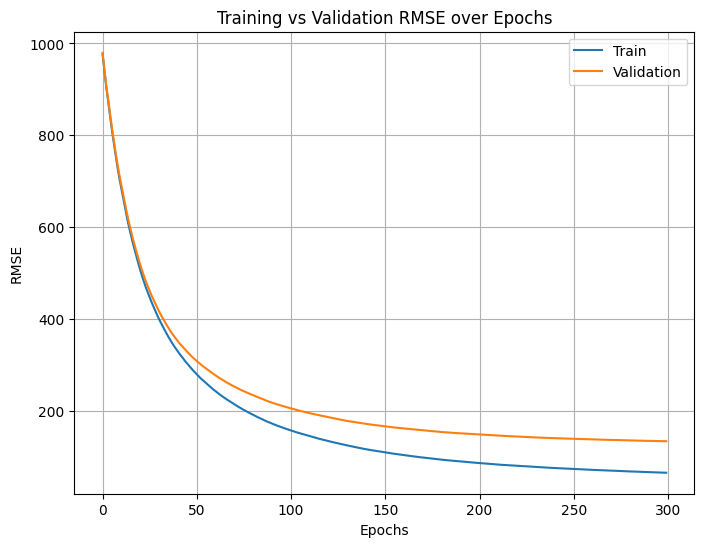

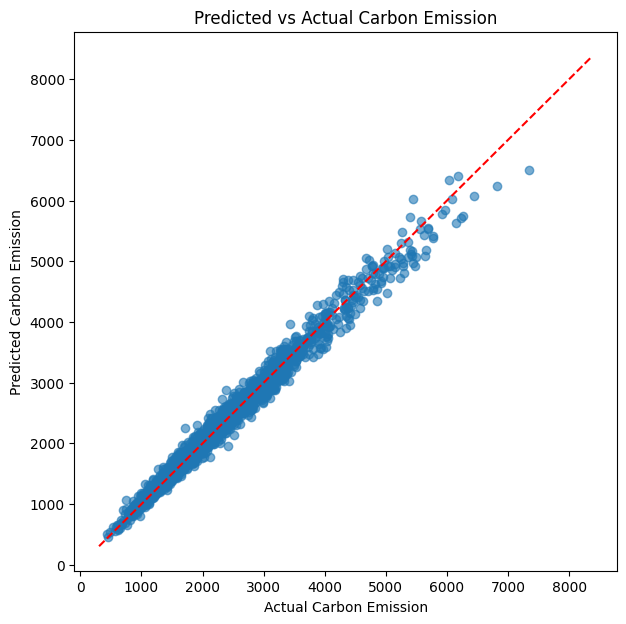

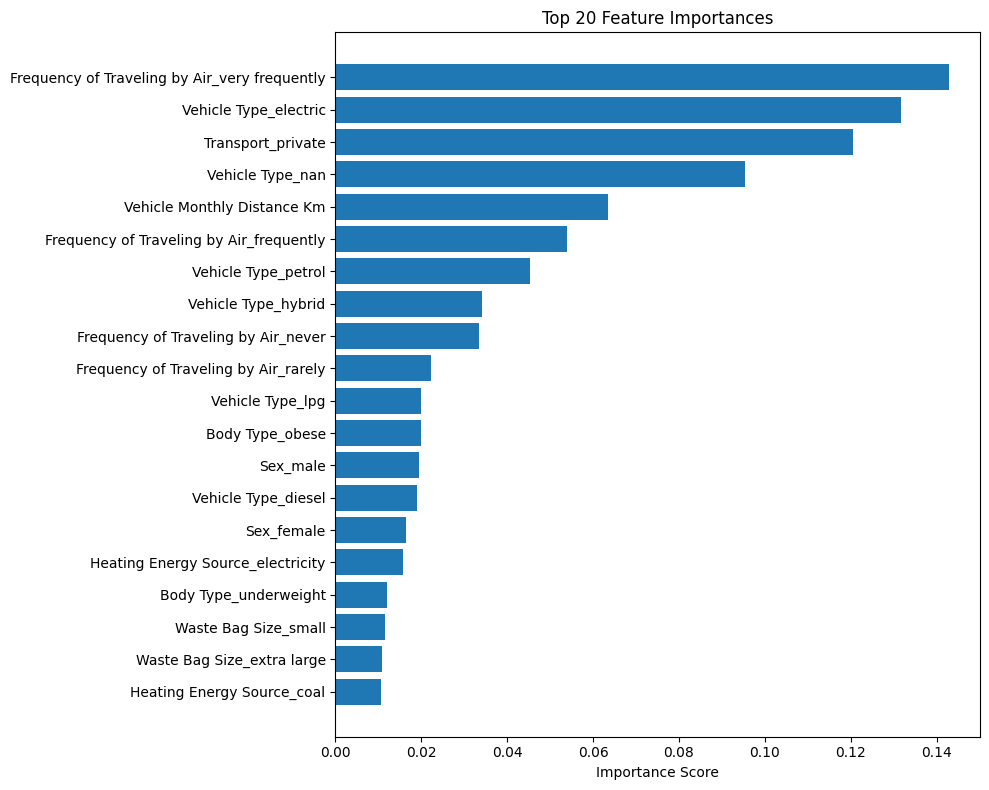

In [5]:
# ============================================
#  CARBON EMISSION MODEL with EPOCH VISUALIZATION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# ----------------------------
# 1. LOAD DATA
# ----------------------------
df = pd.read_csv(r"C:\Users\Admin\Desktop\LY Project C55\Carbon Emission.csv")
df.columns = df.columns.str.strip()

target = 'CarbonEmission'
X = df.drop(columns=[target])
y = df[target]

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# ----------------------------
# 2. PREPROCESSING
# ----------------------------
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ----------------------------
# 3. SPLIT DATA
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 4. PREPROCESS FIRST (so we can train native XGB)
# ----------------------------
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# ----------------------------
# 5. DEFINE MODEL
# ----------------------------
model = XGBRegressor(
    n_estimators=300,       # number of boosting rounds (epochs)
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    eval_metric='rmse',
    verbosity=1
)

# ----------------------------
# 6. TRAIN WITH VALIDATION SET & SHOW PROGRESS
# ----------------------------
eval_set = [(X_train_proc, y_train), (X_test_proc, y_test)]

model.fit(
    X_train_proc, y_train,
    eval_set=eval_set,
    verbose=True
)

# ----------------------------
# 7. EVALUATE
# ----------------------------
y_pred = model.predict(X_test_proc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# ----------------------------
# 8. PLOT TRAINING vs VALIDATION RMSE
# ----------------------------
results = model.evals_result()

epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(8,6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 9. PREDICTED vs ACTUAL PLOT
# ----------------------------
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Predicted vs Actual Carbon Emission")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# ----------------------------
# 10. FEATURE IMPORTANCES
# ----------------------------
cat_features_encoded = preprocessor.named_transformers_['cat'] \
    .named_steps['encoder'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, cat_features_encoded])

importances = model.feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 982.0219968	test: 985.0715570	best: 985.0715570 (0)	total: 205ms	remaining: 1m 42s
50:	learn: 343.4690221	test: 339.0761114	best: 339.0761114 (50)	total: 2.21s	remaining: 19.4s
100:	learn: 248.4326002	test: 240.8736705	best: 240.8736705 (100)	total: 4.29s	remaining: 16.9s
150:	learn: 210.6196122	test: 205.2831225	best: 205.2831225 (150)	total: 6.49s	remaining: 15s
200:	learn: 183.9989085	test: 181.7434157	best: 181.7434157 (200)	total: 8.57s	remaining: 12.7s
250:	learn: 166.4382560	test: 169.6835314	best: 169.6835314 (250)	total: 10.6s	remaining: 10.5s
300:	learn: 149.0274975	test: 158.3275008	best: 158.3275008 (300)	total: 12.6s	remaining: 8.31s
350:	learn: 135.9579312	test: 151.1416608	best: 151.1416608 (350)	total: 14.6s	remaining: 6.21s
400:	learn: 126.8337363	test: 147.2142364	best: 147.2142364 (400)	total: 16.8s	remaining: 4.14s
450:	learn: 117.9021919	test: 142.6310692	best: 142.6310692 (450)	total: 18.9s	remaining: 2.05s
499:	learn: 111.5760334	test: 139.9639401	best:

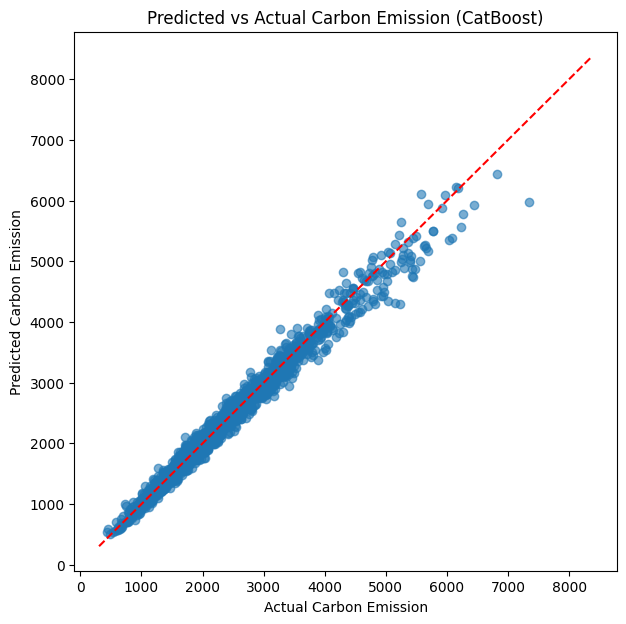

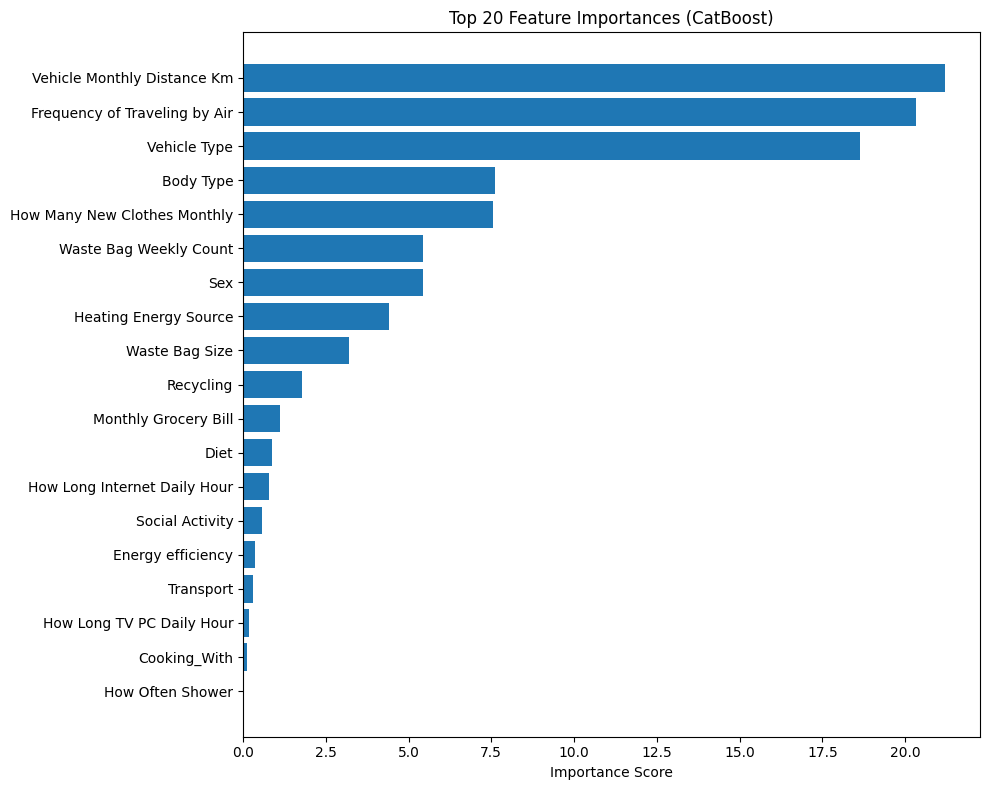


Best iteration (epoch): 499
Best validation RMSE: 139.964


In [11]:
# ============================================
#  CARBON EMISSION MODEL - CATBOOST VERSION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool

# ----------------------------
# 1. LOAD DATA
# ----------------------------
df = pd.read_csv(r"C:\Users\Admin\Desktop\LY Project C55\Carbon Emission.csv")
df.columns = df.columns.str.strip()  # clean spaces in column names

# --- FIX: handle NaNs and types properly ---
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna("Unknown").astype(str)

for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(df[col].median())
# -------------------------------------------

target = 'CarbonEmission'
X = df.drop(columns=[target])
y = df[target]


target = 'CarbonEmission'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical columns (CatBoost needs column indices)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_feature_indices = [X.columns.get_loc(col) for col in cat_features]

# ----------------------------
# 2. TRAIN / TEST SPLIT
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Pool datasets (improves performance)
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_feature_indices)

# ----------------------------
# 3. DEFINE MODEL
# ----------------------------
model = CatBoostRegressor(
    iterations=500,          # epochs
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=30,
    verbose=50               # print progress every 50 iterations
)

# ----------------------------
# 4. TRAIN MODEL
# ----------------------------
model.fit(
    train_pool,
    eval_set=test_pool,
    plot=True  # opens live training vs validation loss graph
)

# ----------------------------
# 5. EVALUATE PERFORMANCE
# ----------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE METRICS")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# ----------------------------
# 6. PREDICTED vs ACTUAL PLOT
# ----------------------------
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Predicted vs Actual Carbon Emission (CatBoost)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# ----------------------------
# 7. FEATURE IMPORTANCE
# ----------------------------
feature_importances = model.get_feature_importance(train_pool)
sorted_idx = np.argsort(feature_importances)[-20:]  # top 20

plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title("Top 20 Feature Importances (CatBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ----------------------------
# 8. SHOW BEST ITERATION
# ----------------------------
print(f"\nBest iteration (epoch): {model.get_best_iteration()}")
print(f"Best validation RMSE: {model.get_best_score()['validation']['RMSE']:.3f}")

0:	learn: 982.0219968	test: 985.0715570	best: 985.0715570 (0)	total: 48.2ms	remaining: 24s
50:	learn: 343.4690221	test: 339.0761114	best: 339.0761114 (50)	total: 2.03s	remaining: 17.9s
100:	learn: 248.4326002	test: 240.8736705	best: 240.8736705 (100)	total: 4.05s	remaining: 16s
150:	learn: 210.6196122	test: 205.2831225	best: 205.2831225 (150)	total: 6.2s	remaining: 14.3s
200:	learn: 183.9989085	test: 181.7434157	best: 181.7434157 (200)	total: 8.32s	remaining: 12.4s
250:	learn: 166.4382560	test: 169.6835314	best: 169.6835314 (250)	total: 10.5s	remaining: 10.5s
300:	learn: 149.0274975	test: 158.3275008	best: 158.3275008 (300)	total: 12.6s	remaining: 8.3s
350:	learn: 135.9579312	test: 151.1416608	best: 151.1416608 (350)	total: 14.6s	remaining: 6.19s
400:	learn: 126.8337363	test: 147.2142364	best: 147.2142364 (400)	total: 16.6s	remaining: 4.09s
450:	learn: 117.9021919	test: 142.6310692	best: 142.6310692 (450)	total: 18.7s	remaining: 2.03s
499:	learn: 111.5760334	test: 139.9639401	best: 139

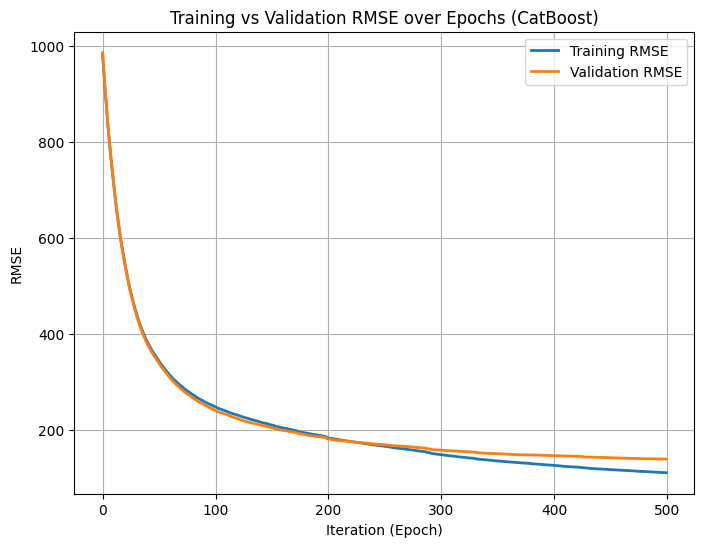


MODEL PERFORMANCE METRICS
MAE:  96.445
RMSE: 139.964
R²:   0.981


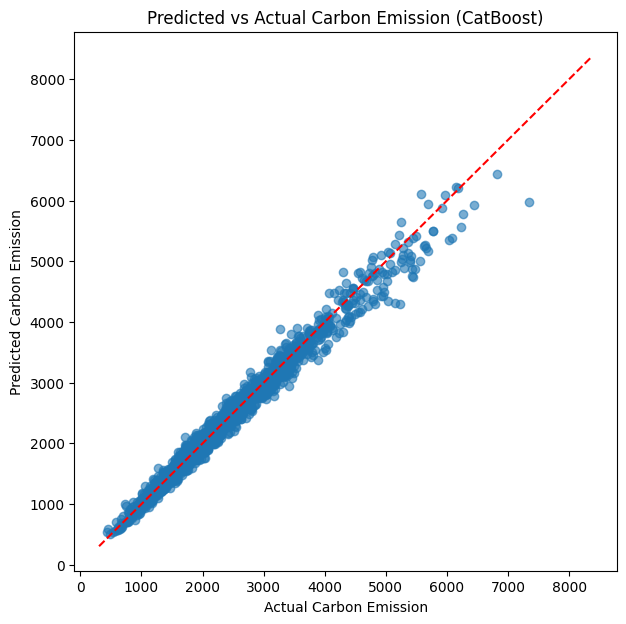

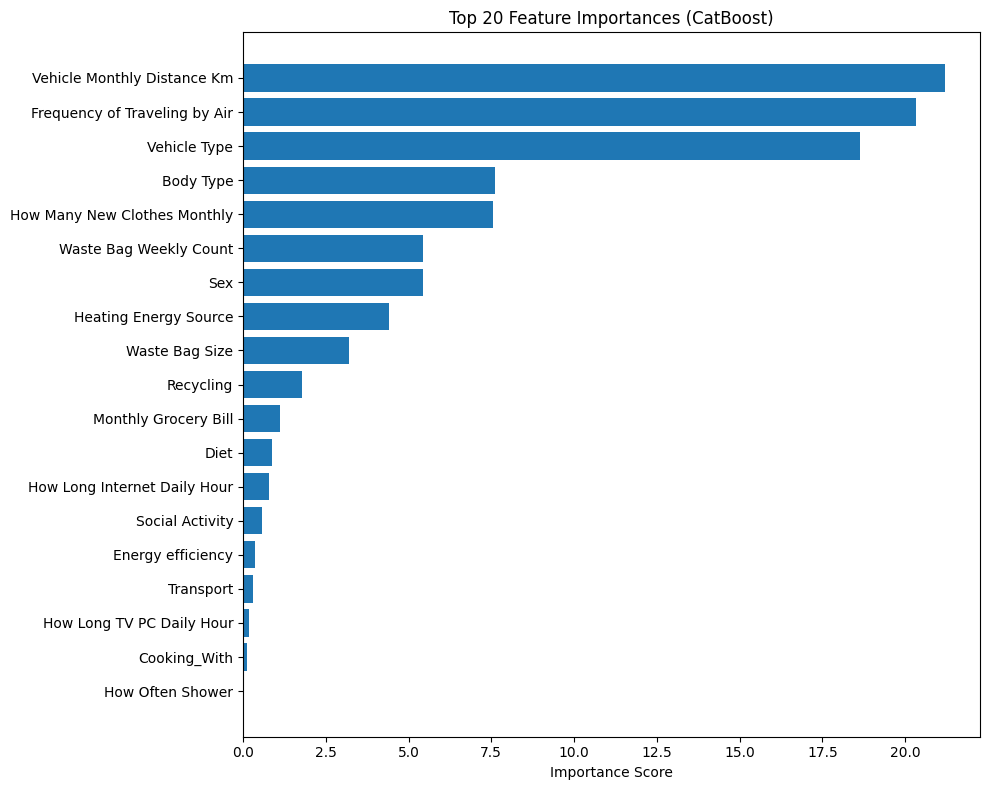


Best iteration (epoch): 499
Best validation RMSE: 139.964


In [12]:
# ============================================
#  CARBON EMISSION MODEL - CATBOOST VERSION (with training history plot)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool

# ----------------------------
# 1. LOAD DATA
# ----------------------------
df = pd.read_csv(r"C:\Users\Admin\Desktop\LY Project C55\Carbon Emission.csv")
df.columns = df.columns.str.strip()  # clean spaces in column names

# --- FIX: handle NaNs and types properly ---
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna("Unknown").astype(str)

for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(df[col].median())
# -------------------------------------------

target = 'CarbonEmission'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical columns (CatBoost needs column indices)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_feature_indices = [X.columns.get_loc(col) for col in cat_features]

# ----------------------------
# 2. TRAIN / TEST SPLIT
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Pool datasets
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_feature_indices)

# ----------------------------
# 3. DEFINE MODEL
# ----------------------------
model = CatBoostRegressor(
    iterations=500,          # epochs
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=30,
    verbose=50
)

# ----------------------------
# 4. TRAIN MODEL
# ----------------------------
model.fit(train_pool, eval_set=test_pool, use_best_model=True, verbose=50)

# ----------------------------
# 5. PLOT TRAINING vs VALIDATION RMSE
# ----------------------------
eval_history = model.get_evals_result()

train_rmse = eval_history['learn']['RMSE']
val_rmse = eval_history['validation']['RMSE']

plt.figure(figsize=(8,6))
plt.plot(train_rmse, label='Training RMSE', linewidth=2)
plt.plot(val_rmse, label='Validation RMSE', linewidth=2)
plt.xlabel("Iteration (Epoch)")
plt.ylabel("RMSE")
plt.title("Training vs Validation RMSE over Epochs (CatBoost)")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 6. EVALUATE PERFORMANCE
# ----------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE METRICS")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# ----------------------------
# 7. PREDICTED vs ACTUAL PLOT
# ----------------------------
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Predicted vs Actual Carbon Emission (CatBoost)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# ----------------------------
# 8. FEATURE IMPORTANCE
# ----------------------------
feature_importances = model.get_feature_importance(train_pool)
sorted_idx = np.argsort(feature_importances)[-20:]  # top 20

plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title("Top 20 Feature Importances (CatBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ----------------------------
# 9. BEST ITERATION
# ----------------------------
print(f"\nBest iteration (epoch): {model.get_best_iteration()}")
print(f"Best validation RMSE: {model.get_best_score()['validation']['RMSE']:.3f}")